# Modelo de predicción de Churn.

# Introducción.

Para cualquier empresa, los clientes representan su activo más valioso. Adquirir nuevos clientes implica un alto costo en términos de trabajo y tiempo, por lo que perderlos puede generar un impacto significativo en el negocio. Sin embargo, ¿qué pasaría si pudiéramos anticiparnos a la pérdida de clientes y tomar medidas para retenerlos?  

A través del uso de técnicas de **Machine Learning**, es posible desarrollar un **modelo de predicción de churn** capaz de identificar qué clientes tienen una alta probabilidad de abandonar el servicio. En este **notebook**, construiremos un modelo de clasificación que analizará información clave, como datos contractuales, servicios de telecomunicaciones y datos personales, para predecir qué clientes podrían darse de baja.  

El objetivo final es desarrollar un modelo altamente preciso que permita a la empresa implementar estrategias efectivas de retención, minimizando la pérdida de clientes y optimizando su rentabilidad.

# Primera parte: Exploración de datos

## Primeros Pasos  

Antes de iniciar el desarrollo del modelo, es fundamental preparar el entorno de trabajo y las herramientas necesarias para el análisis de datos. En este caso, comenzaremos importando las bibliotecas clave, como **pandas**, **numpy** y **matplotlib**, que nos permitirán manipular, analizar y visualizar los datos de manera eficiente.  

Además, cargaremos los conjuntos de datos con los que trabajaremos para entrenar y evaluar el modelo de predicción de churn.

In [ ]:
#Importamosa las librerias necesrias para el análisis de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Creamos los data frames para cada archivo csv.
df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')

## Analisis exploratorio de los datos.

### Analisis de el data frame df_contract



In [ ]:
# Visualizamos información general del conjunto de datos.
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
# Convertimos la columna TotalCharges a tipo numerico

df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')


In [ ]:
#Muestra aleatoria de datos.
df_contract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3614,8039-EQPIM,2014-05-01,No,Two year,No,Bank transfer (automatic),60.25,4055.50
2527,8931-GJJIQ,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,83.30,803.30
3110,6569-KTMDU,2020-01-01,No,Month-to-month,No,Mailed check,19.10,19.10
5614,3301-VKTGC,2014-06-01,No,One year,Yes,Bank transfer (automatic),85.50,5696.60
1440,7677-SJJJK,2019-06-01,No,One year,No,Credit card (automatic),19.90,153.95
2147,2023-VQFDL,2018-08-01,No,Month-to-month,No,Electronic check,19.00,348.80
1584,9906-NHHVC,2014-09-01,No,Two year,Yes,Bank transfer (automatic),53.50,3517.90
5997,3462-BJQQA,2019-08-01,No,Month-to-month,Yes,Electronic check,89.75,552.65
5916,5183-KLYEM,2014-02-01,No,Two year,Yes,Credit card (automatic),112.75,8192.60
5785,0506-YLVKJ,2016-04-01,No,Two year,Yes,Mailed check,20.20,917.45


In [ ]:
# Creamos una lista con los indices de las personas quew han terminado su contrato.

index = df_contract[ df_contract.EndDate != 'No' ]

In [ ]:
index

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
13,0280-XJGEX,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01 00:00:00,One year,Yes,Electronic check,59.80,727.80
7026,8775-CEBBJ,2019-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35
7032,6894-LFHLY,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,75.75,75.75
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25


In [ ]:
# Descripción de los datos para columnas categoricas.
df_contract.select_dtypes(include='object').describe()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4
top,3186-AJIEK,2014-02-01,No,Month-to-month,Yes,Electronic check
freq,1,366,5174,3875,4171,2365


In [ ]:
# Descripción para columnas númericas.
df_contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


### Analisis de el data frame df_internet.

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
df_internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3432,7663-YJHSN,Fiber optic,Yes,Yes,Yes,Yes,Yes,No
3078,1729-VLAZJ,DSL,Yes,Yes,No,Yes,No,No
3497,2665-NPTGL,Fiber optic,No,No,Yes,No,Yes,Yes
276,1343-EHPYB,Fiber optic,No,Yes,Yes,No,Yes,Yes
3207,2476-YGEFM,Fiber optic,No,No,No,No,No,No
5341,4078-SAYYN,Fiber optic,No,No,Yes,No,Yes,Yes
152,2472-OVKUP,Fiber optic,No,Yes,Yes,No,No,Yes
3333,8818-DOPVL,Fiber optic,No,Yes,Yes,No,Yes,Yes
2000,4826-DXMUP,DSL,No,No,No,Yes,Yes,Yes
70,8108-UXRQN,DSL,Yes,No,No,No,Yes,Yes


In [ ]:
df_internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3186-AJIEK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


### Analisis de el data frame df_phone.

In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
df_phone.sample(10)

,customerID,MultipleLines
5824,2346-LOCWC,No
4754,7753-USQYQ,No
5280,0374-IOEGQ,No
4057,6893-ODYYE,No
312,5160-UXJED,No
327,9571-EDEBV,Yes
1209,3910-MRQOY,No
5414,9033-EOXWV,Yes
3479,9065-ZCPQX,Yes
4677,8294-UIMBA,No


### Analisis de el data frame df_personal.

In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
df_personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
1793,4193-IBKSW,Male,0,Yes,Yes
4405,8417-FMLZI,Male,0,Yes,Yes
6333,8651-ENBZX,Female,1,No,No
2648,6131-FOYAS,Male,0,No,No
4766,1043-UXOVO,Female,0,No,No
3849,5089-IFSDP,Female,0,Yes,No
439,3577-AMVUX,Male,0,No,No
3058,2858-MOFSQ,Female,0,No,Yes
5405,4097-YODCF,Male,0,No,Yes
1402,6240-EURKS,Female,0,No,Yes


In [ ]:
# Convertimos la columna SeniorCitizen a tipo object para poder analizarla como tipo categorica
df_personal['SeniorCitizen'] = df_personal['SeniorCitizen'].astype('object')

In [ ]:
df_personal.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043,7043,7043
unique,7043,2,2,2,2
top,3186-AJIEK,Male,0,No,No
freq,1,3555,5901,3641,4933


# Segunda parte: Código de solución.

En la sección anterior, identificamos varios aspectos clave sobre los datos:  

1. La mayoría de las variables son de tipo **categórico**.  
2. No todos los clientes han contratado tanto el servicio de **internet** como el de **telefonía**; algunos utilizan solo uno de ellos.  
3. Es posible generar **nuevas características** a partir de los datos existentes, lo que podría mejorar el desempeño del modelo.  

Con esta información, procederemos al desarrollo del modelo siguiendo varias etapas fundamentales:  
- **Limpieza de datos** para asegurar su calidad y coherencia.  
- **Ingeniería de características** para crear nuevas variables relevantes.  
- **Selección del modelo** más adecuado para la predicción de churn.  

A lo largo de este proceso, optimizaremos el modelo con el objetivo de maximizar su capacidad de predicción y contribuir a la retención de clientes.

## Limpieza de Datos  

Para facilitar el procesamiento y análisis, el primer paso será **unificar los datos de cada cliente** en un único DataFrame, al que llamaremos `df_final`.  

Durante esta fusión, es probable que aparezcan valores **nulos**, ya que no todos los clientes han contratado tanto el servicio de **internet** como el de **telefonía**. Esta situación deberá ser abordada en las siguientes etapas del preprocesamiento para garantizar la integridad y calidad de los datos.

In [ ]:
# Crearemos un data frame para unificar todos los datos y así poder seguir con el análisis

df_final = pd.merge(df_contract, df_internet, on='customerID', how='left')
df_final = pd.merge(df_final, df_personal, on='customerID', how='left')
df_final = pd.merge(df_final, df_phone, on='customerID', how='left')


In [ ]:
# Verificamos si hay datos nulos.
df_final.isna().sum()

,0
customerID,0
BeginDate,0
EndDate,0
Type,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,11
InternetService,1526
OnlineSecurity,1526


Tal como se esperaba, han surgido varios centenares de valores **nulos** en el conjunto de datos. Sin embargo, esto no representa un problema significativo, ya que su tratamiento será un proceso sencillo dentro de las etapas de preprocesamiento.

In [ ]:
# Los nombres de todas las columnas se convertirán a minusculas antes de todo el proceso
df_final.columns = df_final.columns.str.lower()

In [ ]:
# Nos encargaremos de la columna totalcharges

df_final['totalcharges'] = df_final['totalcharges'].fillna( df_final['totalcharges'].median() )

La columna **totalcharges** presenta únicamente **11 valores nulos**, lo que no representa un problema significativo. En este caso, se optará por **rellenar los valores faltantes con la mediana** de la distribución, asegurando así que la imputación no afecte de manera considerable la integridad de los datos.

In [ ]:
# Nos encargamos de la columna internetservice

df_final['internetservice'] = df_final['internetservice'].fillna( 'None' )

En el caso de la columna **internetservice**, es importante recordar que esta indica el tipo de servicio de internet contratado por el cliente. Si el valor es **nulo**, significa que el cliente **no cuenta con ningún servicio de internet**.  

Para manejar estos valores faltantes, se reemplazarán los **NaN** con la categoría `'None'`, creando así una nueva clase dentro de esta variable. Esto permitirá que el modelo pueda diferenciar claramente entre clientes con y sin servicio de internet.

In [ ]:
# Nos encargamos de las columnas onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv y streamingmovies

df_final['onlinesecurity'] = df_final['onlinesecurity'].fillna( 'No' )
df_final['onlinebackup'] = df_final['onlinebackup'].fillna( 'No' )
df_final['deviceprotection'] = df_final['deviceprotection'].fillna( 'No' )
df_final['techsupport'] = df_final['techsupport'].fillna( 'No' )
df_final['streamingtv'] = df_final['streamingtv'].fillna( 'No' )
df_final['streamingmovies'] = df_final['streamingmovies'].fillna( 'No' )

Para las columnas **`onlinesecurity`**, **`onlinebackup`**, **`deviceprotection`**, **`techsupport`**, **`streamingtv`** y **`streamingmovies`**, el razonamiento es similar al de la columna **`internetservice`**.  

Si un valor es **nulo**, significa que el cliente **no ha contratado** ese servicio. Por lo tanto, los valores faltantes se reemplazarán con `'No'`, asegurando que el modelo interprete correctamente la ausencia de estos servicios.

In [ ]:
# Nos encargamos de la columna multiplelines

df_final['multiplelines'] = df_final['multiplelines'].fillna( 'No' )

De manera similar, en la columna **`MultipleLines`**, la presencia de valores **nulos** indica que el cliente **no cuenta con múltiples líneas telefónicas**.  

Por lo tanto, los valores faltantes se reemplazarán con `'No'`, garantizando la coherencia de los datos y evitando posibles problemas durante el entrenamiento del modelo.

In [ ]:
# Comprobamos valores nulos de nuevo.
df_final.isna().sum()

,0
customerid,0
begindate,0
enddate,0
type,0
paperlessbilling,0
paymentmethod,0
monthlycharges,0
totalcharges,0
internetservice,0
onlinesecurity,0


Con los datos **limpios** y **unificados** en un único DataFrame, hemos completado la etapa de preprocesamiento inicial. Ahora podemos avanzar a la siguiente fase en el desarrollo del modelo.

## Ingeniería de Características  

Ahora que los datos están preparados, el siguiente paso es la **ingeniería de características**. En esta etapa, nos enfocaremos en **seleccionar** y **crear** las variables más relevantes con el objetivo de optimizar el rendimiento del modelo.  

Una correcta selección y transformación de características puede mejorar significativamente la capacidad predictiva del modelo, permitiéndole identificar con mayor precisión los clientes en riesgo de churn.



---



Antes de empezar con la ingeieria de caracteristicas crearemos el df_target que contendrá la variable objetivo para realizar pruebas más adelante.

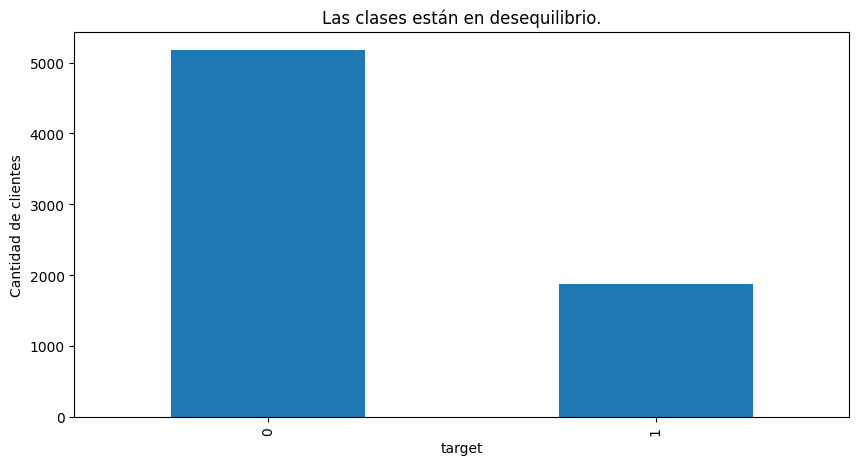

In [ ]:
# Creamos la característica objetivo
df_target = df_final['enddate'].apply(lambda x: 1 if x != 'No' else 0)

# Graficamos el número de instancias en cada clase
df_target.name = 'target'
fig, ax = plt.subplots( figsize=(10,5))
df_target.value_counts().plot(
    kind='bar',
    ax=ax,
    ylabel = 'Cantidad de clientes',
    title = 'Las clases están en desequilibrio.')

plt.show()

Las clases muestran un desequilibrio notable pero este problema será abordado más adelante.

### Creación y modificación de características.

In [ ]:
# Determinamos si el cliente tiene almenos una linea telefonica

df_final['phone'] = df_final['customerid'].apply(lambda x: 'yes' if x in df_phone.customerID.to_list() else 'No')

  

El primer paso en la ingeniería de características será la creación de una nueva variable llamada **`phone`**.  

Actualmente, los datos solo indican si el usuario tiene **múltiples líneas telefónicas**, pero no si cuenta con **al menos una línea contratada**. Para abordar esta limitación, generaremos la columna **`Phone`**, que reflejará si el cliente tiene servicio telefónico, independientemente de la cantidad de líneas.

In [ ]:
# Calculamos la cantidad de días que un cliente tiene con el servicio.
from datetime import datetime


# La función calculate_days recive como parametro una fila del dataframe y devuelve los días que han transcurrido desde
# que el usuario contrato el servicio

def calculate_days( row ):
  if row.enddate != 'No':
    start_date = pd.to_datetime(row.begindate)
    end_date = pd.to_datetime(row.enddate)
    months = (end_date.year - start_date.year) * 365 + (end_date.month - start_date.month) * 30 + (end_date.day - start_date.day)
    return months
  else:
    start_date = pd.to_datetime(row.begindate)
    end_date = datetime(2020,2,1)
    months = (end_date.year - start_date.year) * 365 + (end_date.month - start_date.month) * 30 + (end_date.day - start_date.day)
    return months


df_final['days'] = df_final.apply(calculate_days, axis=1)

Un hallazgo importante durante el análisis de los datos es que los usuarios **más antiguos** son los que menos probabilidades tienen de abandonar el servicio.  

Con base en esta observación, crearemos una nueva característica llamada **`days`**, que indicará al modelo **cuántos días han transcurrido** desde que el usuario contrató el servicio. Esta variable podría proporcionar información valiosa sobre la relación entre la duración del contrato y la probabilidad de churn.

In [ ]:
# Eliminamos las columnas que ya no necesitamos.

df_final = df_final.drop(columns=['begindate', 'enddate'])


En este punto, las columnas **`begindate`** y **`enddate`** ya no son necesarias, ya que la información que contienen ha sido transformada en otras características. Por lo tanto, procederemos a **eliminarlas** del DataFrame para optimizar el conjunto de datos y evitar redundancias.

In [ ]:
# Vamos a convertir las columnas monthlycharges y totalcharges a categoricas.

def categorizar( ran_dict, value ):
    for i in ran_dict:
      if value < ran_dict[i]:
        return i
    return i


monthly_charges_ranges = {
    'baja': 30,
    'media': 60,
    'alta': 90,
    'muy_alta': 120
}

total_charges_ranges = {
    'baja': 500,
    'media': 1500,
    'alta': 3000,
    'muy_alta': 10000
}


df_final['monthlycharges'] = df_final['monthlycharges'].apply(lambda x: categorizar(monthly_charges_ranges, x))

df_final['totalcharges'] = df_final['totalcharges'].apply(lambda x: categorizar(total_charges_ranges, x))

Las variables de tipo **numérico** a veces pueden ser más útiles cuando se agrupan en **categorías**. Este proceso se conoce como **bucketing**. En este caso, utilizaremos esta técnica para transformar algunas de las variables numéricas en categorías, con el fin de facilitar el trabajo del modelo y mejorar su rendimiento predictivo.



---





Después de realizar las transformaciones necesarias en las características, el siguiente paso es aplicar **One-Hot Encoding** y **Standard Scaler**.  

- **One-Hot Encoding** se utilizará para convertir las variables categóricas en un formato numérico adecuado para los modelos de machine learning.  
- **Standard Scaler** se aplicará a las variables numéricas para estandarizarlas, asegurando que todas tengan la misma escala y evitando que aquellas con valores más grandes dominen el modelo.  

Estas transformaciones permitirán que el conjunto de datos sea compatible con **cualquier tipo de modelo**, lo que será clave para la comparación de diferentes enfoques y la selección del más eficiente.

In [ ]:
#Convertimos los datos cataegoricos a numericos con one hot encoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder()
df_encoded = pd.DataFrame(
    # Transformamos todos los datos excepto el customerid y lo transformamos en un dataframe
    encoder.fit_transform(df_final[df_final.iloc[:,1:].select_dtypes(include='object').columns]).toarray(),
    columns=encoder.get_feature_names_out())


In [ ]:
# Estandarizamos datos númericos
days_scaler = StandardScaler()
df_encoded[ df_final.select_dtypes(include='number').columns] = days_scaler.fit_transform(df_final[ df_final.select_dtypes(include='number').columns])


Con esto, hemos finalizado el proceso de **preparación y transformación** de los datos. Ahora, nuestro conjunto de datos está listo para la siguiente etapa del proyecto: la **selección del modelo**, donde compararemos diferentes enfoques para determinar cuál ofrece el mejor rendimiento.

## Selección del Modelo  

En esta sección, evaluaremos diferentes modelos de machine learning para determinar cuál se adapta mejor a nuestro conjunto de datos. Para la comparación, utilizaremos el **Área Bajo la Curva (AUC)** como métrica principal, sin realizar ajustes iniciales en los modelos.  

Dado que nuestro conjunto de datos está compuesto principalmente por **características categóricas**, es probable que los modelos basados en **árboles de decisión** ofrezcan el mejor rendimiento. Sin embargo, también probaremos enfoques alternativos, como **modelos lineales** y algoritmos basados en **distancia euclidiana**, como **K-Nearest Neighbors (KNN)**.  

Este análisis nos permitirá seleccionar el modelo más adecuado para predecir la retención de clientes de manera eficiente.

In [ ]:
# Comparación del rendimiento de multiples mosdelos.

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


scores = []

# Modelos sobre los que se realizarán pruebas.
models = [RandomForestClassifier( random_state=42),
          AdaBoostClassifier( random_state=42),
          GradientBoostingClassifier( random_state=42),
          LinearSVC( random_state=42),
          LogisticRegression( random_state=42),
          KNeighborsClassifier(),
          BaggingClassifier( random_state=42),
          SGDClassifier( random_state=42),
          SVC( random_state=42)
          ]
# Nombres de los modelos.
models_names = ['Random Forest',
                'AdaBoost',
                'Gradient Boosting',
                'Linear SVC',
                'Logistic Regression',
                'KNN',
                'Bagging',
                'SGD',
                'SVC']

# Prueba de rendimiento para cada modelo.
for index in range(len(models)):
  score = cross_val_score(models[index], df_encoded, df_target, cv=7, scoring='roc_auc')

  scores.append( score.mean() )


La celda de código anterior utiliza **validación cruzada** para calcular el **AUC** de cada modelo y comparar su rendimiento.  

Optamos por la validación cruzada porque es un método **robusto y confiable** para estimar el desempeño de un modelo en datos no vistos. Al dividir los datos en múltiples subconjuntos de entrenamiento y prueba, garantizamos una evaluación más equilibrada y reducimos el riesgo de sobreajuste.

In [ ]:
# Creamos un data frame con los resultados obtenidos para poder gráficarlos
df_scores = pd.DataFrame( {'score':scores, 'model':models_names } )
df_scores.sort_values(by='score', ascending=False, inplace=True)

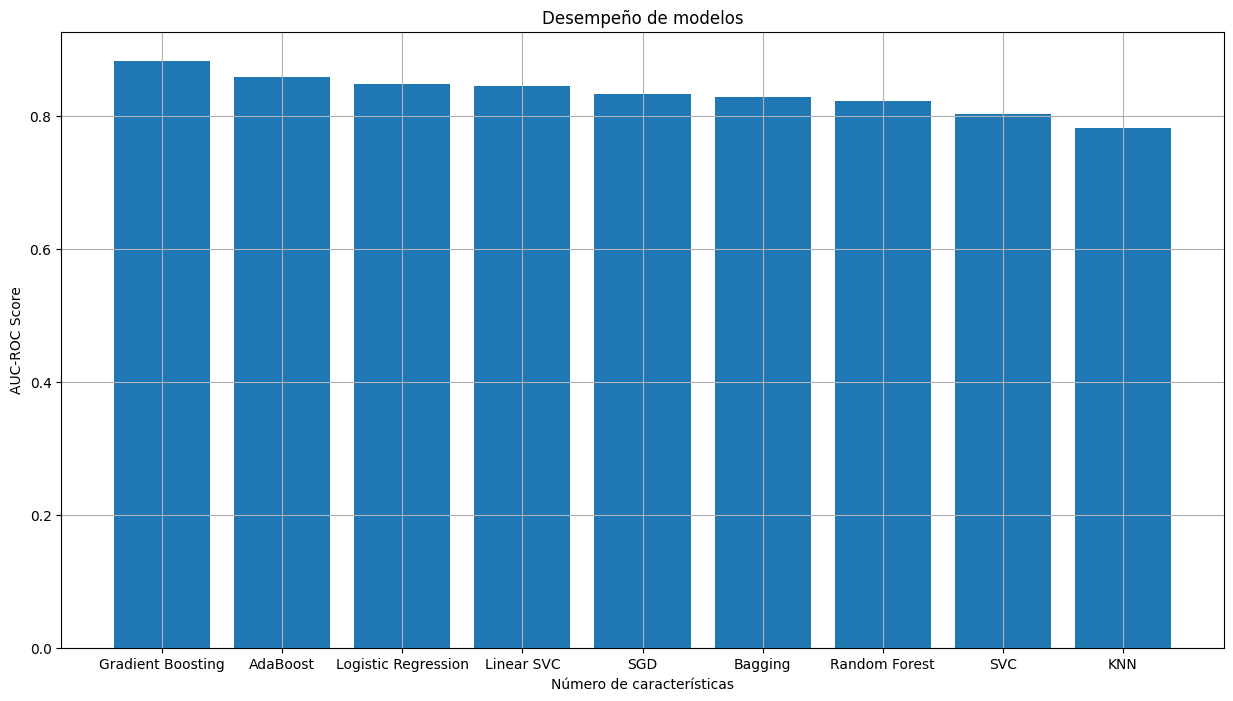

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(df_scores['model'], df_scores['score'])
ax.set_xlabel('Número de características')
ax.set_ylabel('AUC-ROC Score')
ax.set_title('Desempeño de modelos')
plt.grid()
plt.show()



Como se observa en la gráfica, el rendimiento de todos los modelos es **bastante sólido**, incluso sin realizar ajustes en los hiperparámetros. Sin embargo, los dos mejores modelos son:  

- **AdaBoost**, con un AUC aproximado de **0.85**.  
- **Gradient Boosting**, que alcanza casi **0.89** de AUC.  

Es importante destacar que estos modelos han logrado un desempeño sobresaliente **a pesar del desequilibrio de clases** y sin optimización previa de sus hiperparámetros.  

Ahora que hemos identificado los modelos más prometedores, avanzaremos a la siguiente sección, donde nos enfocaremos en **mejorar su rendimiento** mediante el ajuste de hiperparámetros y técnicas de optimización.

## Mejorando el Rendimiento del Modelo  

En la sección anterior, identificamos que el modelo con mejor desempeño en nuestro conjunto de datos es **GradientBoostingClassifier**, alcanzando un **AUC-ROC de 0.89**. Es importante recordar que este resultado se obtuvo **sin abordar el problema del desequilibrio de clases** y sin realizar **ajustes en los hiperparámetros**.  

### Estrategia de Optimización  

En esta sección, intentaremos mejorar el rendimiento del modelo mediante:  
1. **Tratamiento del desbalance de clases**.  
2. **Ajuste de hiperparámetros** para optimizar su desempeño.  

Sin embargo, es importante considerar que **GradientBoostingClassifier**, al estar basado en árboles de decisión, maneja **relativamente bien** el desequilibrio de clases, por lo que el sobremuestreo podría no proporcionar una mejora significativa.  

### Consideraciones sobre Validación y Optimización  

Si el **sobremuestreo** resulta ser una estrategia viable, debemos tener en cuenta que métodos como **validación cruzada** y **RandomizedSearchCV** podrían **no ser directamente aplicables** sin modificaciones. Esto se debe al riesgo de **data leakage**, lo que podría sesgar la evaluación del modelo y generar resultados poco confiables.  


In [ ]:
# Se dividirán los datos en un conjunto de entrenamiento y uno de prueba

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    df_encoded,
    df_target,
    test_size=0.3,
    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42)


El primer paso será determinar si el **sobremuestreo** mejora el desempeño del modelo. Para ello, crearemos tres conjuntos de datos:  

1. **Conjunto de entrenamiento**: Utilizado para ajustar el modelo.
2. **Conjunto de validación**: Ayudará a ajustar los hiperparámetros y evitar sobreajuste.  
3. **Conjunto de prueba**: Empleado para evaluar el desempeño final.    

Esta estructura nos permitirá comparar el rendimiento del modelo con y sin sobremuestreo de manera objetiva.

In [ ]:
# La función eval_mod nos ayudará a evaluar el modelo más fácilmente.
from sklearn.metrics import roc_auc_score

def eval_mod(model, X_train, y_train, X_val, y_val,):
  model.fit(X_train, y_train)
  y_pred = model.predict_proba(X_val)
  y_pred = y_pred[:,1]
  return roc_auc_score(y_val, y_pred)

In [ ]:

model = GradientBoostingClassifier( random_state=42)

score = eval_mod(model, X_train, y_train.values.ravel(), X_val, y_val)

print( f'El AUC-ROC del modelo actualmente es de: {score}')

El AUC-ROC del modelo actualmente es de: 0.8988251558136525


Antes de ejecutar el **sobremuestreo**, es importante recordar que el modelo actualmente alcanza un **AUC-ROC de 0.8988**.  

Este valor servirá como referencia para evaluar si la aplicación del sobremuestreo genera una **mejora significativa** en el rendimiento del modelo o si, por el contrario, no aporta beneficios sustanciales.

In [ ]:
# # Ahora abordaremos el problema del desbalanceo de clases con un sobremuestreo.
from sklearn.utils import shuffle

majority = y_train[y_train == 0]
minority = y_train[y_train == 1]

total = len(majority) - len(minority)

samples_x = pd.DataFrame()
samples_y = pd.DataFrame()

for i in range(total):
    index = minority.sample(1).index[0]
    samples_x = pd.concat([samples_x, X_train.loc[[index]]])
    samples_y = pd.concat([samples_y, y_train.loc[[index]]])

X_train = pd.concat([X_train, samples_x])
y_train = pd.concat([y_train, samples_y])

# Mezclamos los dataframes aleatoriamente
X_train, y_train = shuffle(X_train, y_train, random_state=42)

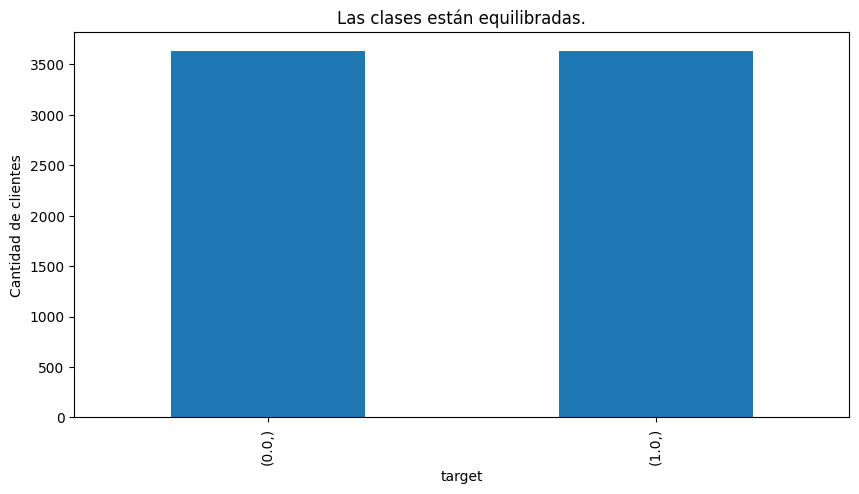

In [ ]:
# Comprobamos el equilibrio de las clases
fig, ax = plt.subplots( figsize=(10,5))
y_train.value_counts().plot(
    kind='bar',
    ax=ax,
    ylabel = 'Cantidad de clientes',
    title = 'Las clases están equilibradas.')

plt.show()

In [ ]:

model = GradientBoostingClassifier(random_state=42)

eval_mod(model, X_train, y_train.values.ravel(), X_val, y_val)

np.float64(0.8975421205452091)



Desafortunadamente, en este caso, el **sobremuestreo no proporciona ninguna mejora significativa** en el desempeño del modelo. Esto indica que **GradientBoostingClassifier** no se ve afectado por el desbalance de clases y es capaz de manejarlo de manera efectiva.  

Si bien el sobremuestreo no resultó útil, su descarte nos brinda **dos ventajas clave**:  

1. **Facilita la validación y optimización del modelo**, ya que ahora podemos emplear **validación cruzada** y **búsqueda aleatoria de hiperparámetros** sin preocuparnos por el riesgo de **data leakage**.  
2. **Mayor cantidad de datos para el entrenamiento**, ya que ahora solo necesitaremos dos conjuntos:  
   - **Conjunto de entrenamiento**: Para ajustar el modelo.  
   - **Conjunto de prueba**: Para evaluar su desempeño final.  

Al no requerir un conjunto de validación separado, **aprovechamos mejor los datos disponibles**, lo que potencialmente puede mejorar la capacidad del modelo para generalizar.

In [ ]:
# Creamos los conjuntos de datos necesarios.
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded,
    df_target,
    test_size=0.15,
    random_state=42)

Dado que **GradientBoostingClassifier** cuenta con una gran cantidad de hiperparámetros, ajustarlos manualmente sería un proceso demasiado lento e ineficiente.  

Para optimizar el modelo de manera más rápida y efectiva, utilizaremos **RandomizedSearchCV**, una técnica que permite explorar una amplia gama de combinaciones de hiperparámetros de forma aleatoria, maximizando las probabilidades de encontrar una configuración óptima en **menos tiempo**.  

Este enfoque nos permitirá mejorar el desempeño del modelo sin necesidad de realizar un ajuste manual exhaustivo.

In [ ]:
# # Realizamos busqueda aleatoria de parametros para gradient boost

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# model_gradient = GradientBoostingClassifier(random_state=42, n_iter_no_change=20, tol=.001)

# param_grid = {
#     'n_estimators': randint(50,500),
#     'learning_rate': uniform(0.01, 1),
#     'max_depth': randint(3,15),
#     'min_samples_split': randint(2,40),
#     'min_samples_leaf': randint(1,20),
# }

# #Usamos la busqueda de parametros de forma aleatoria
# random = RandomizedSearchCV(model_gradient, param_grid, n_iter=300, cv=7, scoring='roc_auc', random_state=42, n_jobs=-1)

# random.fit(X_train, y_train)


# print(f'Los mejores parametros son: {random.best_params_}')
# print(f'El mejor score es: {random.best_score_}')

> **Nota:**  
> La celda anterior ejecuta **RandomizedSearchCV** para buscar la mejor combinación de hiperparámetros. Sin embargo, debido a que su ejecución puede tomar un tiempo considerable (**aproximadamente 30 minutos**), el código ha sido **comentado** para evitar su ejecución automática.  

A continuación, se presentan los **mejores parámetros encontrados** por la búsqueda aleatoria:  

- **`learning_rate`**: `0.5012`  
- **`max_depth`**: `3`  
- **`min_samples_leaf`**: `3`  
- **`min_samples_split`**: `33`  
- **`n_estimators`**: `276`  

Con esta configuración, el **mejor puntaje obtenido** fue: **0.9206**.  

Si deseas **comprobar estos resultados**, simplemente **descomenta las líneas de código** correspondientes y ejecuta nuevamente esta sección.

Como paso final, se realizará una selección de las características más relevantes. Este proceso tiene como objetivo eliminar aquellas variables que no aportan valor significativo al modelo, reduciendo así la complejidad del conjunto de datos. Al descartar características innecesarias, se optimiza el rendimiento del modelo, mejorando tanto la eficiencia computacional como la precisión de las predicciones.

In [ ]:
# # Revisando las caracteristicas con mayor importancia.
# importances = random.best_estimator_.feature_importances_

# importances = pd.DataFrame({'feature':X_train.columns, 'importance':importances})

# importances.sort_values(by='importance', ascending=False, inplace=True)

# importances.plot(kind='bar', x='feature', y='importance', figsize=(15,8))
# plt.show()


Como se puede observar en la gráfica, la mayoría de las características no aportan un valor significativo al modelo. En realidad, existen cinco factores clave que influyen en la decisión de un cliente de abandonar o no el servicio:

- El tiempo que el cliente ha permanecido con la compañía.
- Si el pago del servicio se realiza de forma mensual.
- Si el tipo de conexión a internet es mediante fibra óptica.
- Si el método de pago es a través de cheque electrónico.
- Si el cliente cuenta o no con servicio de internet.

Con base en esta información, es posible reducir el número total de características de 45 a solo 5. Esta reducción conlleva una mejora sustancial en el tiempo de predicción y en la eficiencia del modelo. A continuación, evaluaremos el rendimiento del modelo utilizando únicamente estas cinco variables.


In [ ]:
# main_features = importances.head(5).feature.to_list()

# puntajes = cross_val_score(random.best_estimator_, X_train[main_features], y_train, cv=7, scoring='roc_auc')

# print(f'El score del modelo es: {puntajes.mean()}')

> **Nota:**  
> Las celdas anteriores dependen de **RandomizedSearchCV** para buscar la mejor combinación de hiperparámetros. Sin embargo, debido a que su ejecución puede tomar un tiempo considerable (**aproximadamente 30 minutos**), el código ha sido **comentado** para evitar su ejecución automática.  


Como se puede observar, el modelo mejoró significativamente tras la reducción de características, aumentando el valor del AUC de **0.9206** a **0.9303**. Esta mejora es el resultado de eliminar variables irrelevantes y de **ajustar adecuadamente los hiperparámetros**.

Gracias a esta optimización, el modelo no solo es más eficiente, sino también más preciso en sus predicciones. Con esta etapa completada, estamos en condiciones de avanzar a la siguiente fase del proyecto: **el entrenamiento y la evaluación final del modelo**.

## Entrenamiento y Evaluación del Modelo  

En esta sección, evaluaremos la **efectividad real** de todas las estrategias y ajustes aplicados hasta el momento.  

Para ello, procederemos con el **entrenamiento** del modelo y su posterior **evaluación**, asegurándonos de que:  

- **Generalice correctamente** a nuevos datos.  
- **No presente sobreajuste**, manteniendo un equilibrio entre sesgo y varianza.  

Este análisis nos permitirá validar si las mejoras implementadas han tenido un impacto positivo en el rendimiento del modelo.


### Entrenamiento del Modelo  

En este paso, procederemos a **entrenar el modelo** utilizando el conjunto de **datos de entrenamiento** y los **hiperparámetros óptimos** obtenidos en nuestra búsqueda.  

Este proceso permitirá que el modelo **aprenda los patrones** en los datos para realizar predicciones precisas en la siguiente etapa de evaluación.

In [ ]:
# Principales features del modelo.
main_features = ['days','type_Month-to-month', 'internetservice_Fiber optic', 'paymentmethod_Electronic check', 'internetservice_None' ]


In [ ]:
# Parametros obtenidos en la busqueda.
best_params = {'learning_rate': 0.5012, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 33, 'n_estimators': 276}

In [ ]:
# Reduciendo las carecteristicas solo a las prioncipales.
X_train = X_train[main_features]
X_test = X_test[main_features]

In [ ]:
final_model = GradientBoostingClassifier(random_state=42, **best_params)

final_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5012, min_samples_leaf=3,
                           min_samples_split=33, n_estimators=276,
                           random_state=42)

### Evaluación del Modelo  

Para garantizar que el modelo **no esté sobreajustado**, analizaremos su comportamiento mediante **curvas de aprendizaje (learning curves)**.  

Posteriormente, realizaremos la **evaluación final** utilizando el **conjunto de prueba**, lo que nos permitirá medir el desempeño real del modelo en datos no vistos.  

Este análisis nos brindará una visión clara sobre la **capacidad de generalización** del modelo y la efectividad de las estrategias implementadas.

In [ ]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, val_scores = learning_curve(
    final_model,
    X_train,
    y_train,
    train_sizes=np.linspace(0.01, 1, 20),
    cv=7,
    scoring='roc_auc',
    random_state=42
    )

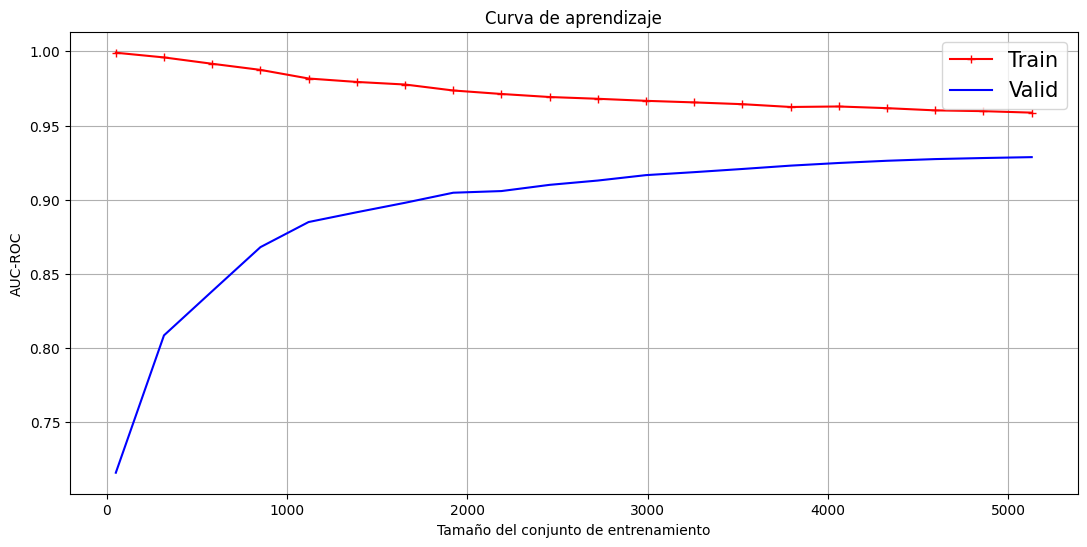

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(13, 6))
plt.plot(train_sizes, train_scores_mean,'r-+', label='Train')
plt.plot(train_sizes, val_scores_mean, 'b-', label='Valid')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('AUC-ROC')
plt.title('Curva de aprendizaje')
plt.legend( fontsize=15 )
plt.grid()
plt.show()

Los resultados muestran que las **curvas de aprendizaje no convergen completamente**, pero la diferencia entre ellas es mínima, aproximadamente **0.03** en el puntaje AUC.  

Además, la **tendencia de las curvas** indica que, con más datos, podrían **converger en un valor cercano a 0.945 AUC**. Esto sugiere que el modelo **no está ni sobreajustado ni subajustado**, manteniendo un buen equilibrio entre **sesgo y varianza**.  

Dado este análisis, podemos proceder con la **prueba final del modelo utilizando el conjunto de prueba**.  

Es crucial realizar esta prueba solo al final del proceso. Si se utilizara antes, podríamos **introducir un sesgo inconsciente** en el ajuste del modelo, optimizándolo en exceso para este conjunto de datos específico. Esto llevaría a un modelo que solo es efectivo en el conjunto de prueba, pero **no generaliza bien a nuevos datos**, afectando su confiabilidad.  

Al evaluar el modelo en este punto, garantizamos que su desempeño refleje **su verdadera capacidad predictiva en datos no vistos**.

In [ ]:
# Prueba del modelo con el conjunto test

y_pred = final_model.predict_proba(X_test)

y_pred = y_pred[:,1]

auc_final = roc_auc_score(y_test, y_pred)

print(f'El score del modelo es: {auc_final}')

El score del modelo es: 0.9342118508350492



El modelo obtuvo un **AUC de 0.934** en el conjunto de test, lo que indica una **excelente capacidad de predicción**, incluso con datos no vistos previamente.  

Este resultado confirma que **todas las etapas del desarrollo del modelo fueron implementadas correctamente**, incluyendo:  

- **Limpieza y preparación de datos**  
- **Ingeniería de características**  
- **Selección del modelo**  
- **Ajuste de hiperparámetros**  
- **Evaluación del rendimiento**  

Gracias a este enfoque estructurado, el modelo es **robusto, preciso y confiable**, demostrando su eficacia para la tarea de clasificación.

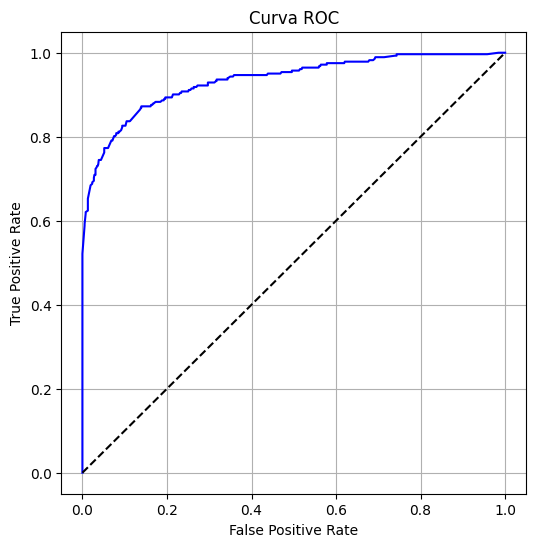

In [ ]:
# Gráfica de la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, 'b-')
plt.plot([0, 1], [0, 1], 'k--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()



Además, la **curva ROC** respalda visualmente el desempeño del modelo, mostrando una separación clara entre las clases y validando su capacidad predictiva.  


In [ ]:
# Calculando precision y recall

from sklearn.metrics import precision_recall_curve

y_pred = final_model.predict_proba(X_test)

y_pred = y_pred[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)



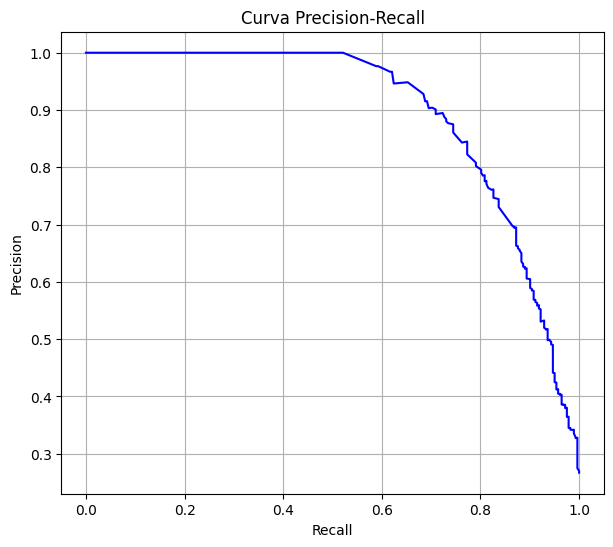

In [ ]:

plt.figure(figsize=(7, 6))
plt.plot(recalls, precisions, 'b-')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()



## Conclusión

A lo largo de este proyecto, hemos logrado desarrollar un modelo predictivo de **Churn** altamente eficaz, capaz de identificar a los clientes con mayor probabilidad de abandonar el servicio. Este modelo fue construido a partir de un conjunto de datos que contenía información sobre los clientes y sus servicios contratados, y pasó por diversas etapas para optimizar su rendimiento:

1. **Preparación y limpieza de datos**: Tratamos los valores nulos, transformamos variables y creamos nuevas características para enriquecer la información disponible.
2. **Ingeniería de características**: Identificamos y generamos nuevas variables que ayudaron a mejorar la capacidad predictiva del modelo.
3. **Selección y ajuste del modelo**: Probamos varios algoritmos, encontrando que los modelos basados en árboles, como el **Gradient Boosting**, fueron los más adecuados para el conjunto de datos desbalanceado. Además, optimizamos sus hiperparámetros utilizando **RandomizedSearchCV**.
4. **Evaluación del modelo**: Implementamos métricas robustas como el **AUC-ROC** y las **curvas de aprendizaje** para garantizar que el modelo generalizara correctamente y no sufriera de sobreajuste o subajuste.

El modelo final alcanzó un **AUC de 0.934**, lo que demuestra un alto nivel de predicción, incluso con datos desconocidos. La curva ROC también mostró una excelente separación entre las clases, validando aún más la capacidad del modelo para clasificar correctamente a los clientes.

Este resultado resalta el éxito de cada paso en el proceso de desarrollo y demuestra que, con las técnicas adecuadas y el enfoque correcto, es posible construir un modelo preciso y confiable para predecir el churn y ayudar a la empresa a retener a sus clientes más valiosos.